<a href="https://colab.research.google.com/github/JACOBABRAHAMJANE/y122/blob/main/dlprog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1

In [ ]:
#1
import numpy as np
import pandas as pd
def threshold(x):
  return 1 if x>=1 else 0
def fire (data, weights,output):
  for x in data:
    weight_sum  = np.inner(x,weights)
    output.append(threshold(weight_sum))
data = [[0,0],[0,1],[1,0],[1,1]]
weights = [1,1]
output = []
fire(data,weights,output)

y= pd.DataFrame(index = None)
y['[x1,x2]'] = pd.Series(data)
y['weights'] = pd.Series(weights)
y['Y'] = pd.Series(output)
print(y)

  [x1,x2]  weights  Y
0  [0, 0]      1.0  0
1  [0, 1]      1.0  1
2  [1, 0]      NaN  1
3  [1, 1]      NaN  1


#2

In [ ]:
#2
A = [-1,1,1,1,-1,1,-1,-1,-1,1,1,1,1,1,1,1,-1,-1,-1,1,1,-1,-1,-1,1]
E = [1,1,1,1,1,1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,-1,-1,1,1,1,1,1]
weights = [0]*len(A)
bias = 0
def recognize(input,target):
  global weights, bias
  for i in range (len(input)):
      weights[i]+= target * input[i]
  bias += target
  return weights

weights = recognize(A,1)
final_weights = recognize(E,-1)
print(final_weights)
sum_a = 0
sum_b = 0
# Change: Use the minimum length to avoid IndexError
for i in range(len(A)):
  sum_a = sum_a +A[i]*final_weights[i]
# Change: Use the minimum length to avoid IndexError
for i in range(len(E)):
  sum_b = sum_b+E[i]*final_weights[i]
print(sum_a)
print(sum_b)
if sum_a > 0 :
  print("A is recognized with value 1")
else:
  print("A is not recognized")
if sum_b < 0 :
  print("E is recognized with value -1")
else:
  print("E is not recognized")

[-2, 0, 0, 0, -2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, -2, -2, -2, 0]
14
-14
A is recognized with value 1
E is recognized with value -1


# 3

In [ ]:
#3
import numpy as np
class perceptron:
  def __init__(self):
    self.weight = np.array([0,0])
    self.bias = 0
  def predict(self, x):
    return 1 if np.dot(x, self.weight) + self.bias >= 0 else 0
  def train(self, inputs, labels, epoch=10):
    for _ in range (epoch):
      for x, y in zip(inputs, labels):
        error = y - self.predict(x)
        self.weight += error * x
        self.bias += error
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
labels = np.array([0,0,0,1])
p = perceptron()
p.train(inputs, labels)
for x in inputs :
  print(f"{x} is {p.predict(x)}")

[0 0] is 0
[0 1] is 0
[1 0] is 0
[1 1] is 1


# 4

In [ ]:
# @title
#4
weight1 = 0.2
weight2 = 0.2
learnig_r = 0.2
bias =0
t_d = [(1,1,1),(1,-1,1),(-1,1,1),(-1,-1,-1)]
print(f"{'x1':>3}{'x2':>3}{' target':>7}{'y_in':>7}{'w1:':>8}{'w2':>8}{'b':>8}{'weight1':>8}{'weight2':8}{'bias':>8}{'squared_error':>15}")
for epoch in range(4):
  total_square_e = 0
  for input1,input2,target in t_d:
    y_in = bias+ (weight1*input1)+(weight2*input2)
    error_term = target - y_in
    data_weight1 = learnig_r*error_term*input1
    data_weight2 = learnig_r*error_term*input2
    data_bias = learnig_r*error_term
    weight1 += data_weight1
    weight2 += data_weight2
    bias += data_bias
    squared_error = error_term**2
    total_square_e += squared_error
    print(f"{input1:>3}{input2:>3}{target:>7}{y_in:>7.2f}{error_term:>7.2f}{ data_weight1:>8.2f}{data_weight2:8.2f}{data_bias:>8.2f}{weight1:>8.2f}{weight2:>8.2f}{bias:>8.2f}{squared_error:>15.4f}")
  print(f"total squared error={total_square_e:.2f}")
  print()

 x1 x2 target   y_in     w1:      w2       b weight1weight2     bias  squared_error
  1  1      1   0.40   0.60    0.12    0.12    0.12    0.32    0.32    0.12         0.3600
  1 -1      1   0.12   0.88    0.18   -0.18    0.18    0.50    0.14    0.30         0.7744
 -1  1      1  -0.06   1.06   -0.21    0.21    0.21    0.28    0.36    0.51         1.1151
 -1 -1     -1  -0.13  -0.87    0.17    0.17   -0.17    0.46    0.53    0.33         0.7520
total squared error=3.00

  1  1      1   1.32  -0.32   -0.06   -0.06   -0.06    0.39    0.46    0.27         0.1028
  1 -1      1   0.20   0.80    0.16   -0.16    0.16    0.55    0.30    0.43         0.6412
 -1  1      1   0.18   0.82   -0.16    0.16    0.16    0.39    0.47    0.59         0.6726
 -1 -1     -1  -0.26  -0.74    0.15    0.15   -0.15    0.54    0.62    0.45         0.5405
total squared error=1.96

  1  1      1   1.60  -0.60   -0.12   -0.12   -0.12    0.42    0.50    0.33         0.3594
  1 -1      1   0.25   0.75    0.15   -0.15  

# 5

In [ ]:
#5
v1,v2,b3,alpha = 0.5,0.5,0.5,0.5
w11 , w12 = 0.05 , 0.1
w21 ,w22 = 0.2 , 0.2
b1 , b2 = 0.3 , 0.15
inputs = [(1,1,-1),(1,-1,1),(-1,1,1),(-1,-1,-1)]
for epoches in range (1,6):
    print("Epoche",epoches)
    print(f"{'x1':>3}{'x2':>3}{'t':>3}{'zin1':>6}{'zin2':>6}{'w11':>6}{'w21':>6}{'b1':>6}{'w12':>6}{'w22':>6}{'b2':>6}{'z1':>3}{'z2':>3}{'yin':>6}{'y':>3}")
    for x1,x2,t in inputs:
        zin1 = x1*w11 + x2*w21 + b1
        zin2 = x1*w12 + x2*w22 + b2
        if zin1 >= 0:
            z1 = 1
        else:
            z1 = -1
        if zin2 >= 0:
            z2 = 1
        else:
            z2 = -1
        yin = z1*v1 + z2 *v2 + b3
        if yin >= 0:
            y = 1
        else:
            y = -1
        if t == y:
            w11,w12,w21,w22,b1,b2 = w11,w12,w21,w22,b1,b2
        elif t != y and t == 1:
            if abs(zin1) < abs(zin2):
                w11 = w11 + alpha * (1-zin1) * x1
                w21 = w21 + alpha * (1-zin1) * x2
                b1 = b1 + alpha * (1-zin1)
            else:
               w12 = w12 + alpha * (1-zin2) * x1
               w22 = w22 + alpha * (1-zin2) * x2
               b2 = b2 + alpha * (1-zin2)

        elif t != y and t == -1:
            if z1 > 0:
                w11 = w11 + alpha * (-1-zin1) * x1
                w21 = w21 + alpha * (-1-zin1) * x2
                b1 = b1 + alpha * (-1-zin1)
            if z2 > 0:
               w12 = w12 + alpha * (-1-zin2) * x1
               w22 = w22 + alpha * (-1-zin2) * x2
               b2 = b2 + alpha * (-1-zin2)

        print(f"{x1:>3}{x2:>3}{t:>3}{zin1:>6.2f}{zin2:>6.2f}{w11:>6.2f}{w21:>6.2f}{b1:>6.2f}{w12:>6.2f}{w22:>6.2f}{b2:>6.2f}{z1:>3}{z2:>3}{yin:>6.2f}{y:>3}")

Epoche 1
 x1 x2  t  zin1  zin2   w11   w21    b1   w12   w22    b2 z1 z2   yin  y
  1  1 -1  0.55  0.45 -0.72 -0.57 -0.48 -0.63 -0.53 -0.58  1  1  1.50  1
  1 -1  1 -0.62 -0.68  0.09 -1.39  0.34 -0.63 -0.53 -0.58 -1 -1 -0.50 -1
 -1  1  1 -1.14 -0.48  0.09 -1.39  0.34 -1.36  0.21  0.16 -1 -1 -0.50 -1
 -1 -1 -1  1.64  1.31  1.41 -0.07 -0.98 -0.21  1.37 -0.99  1  1  1.50  1
Epoche 2
 x1 x2  t  zin1  zin2   w11   w21    b1   w12   w22    b2 z1 z2   yin  y
  1  1 -1  0.36  0.17  0.73 -0.75 -1.66 -0.79  0.78 -1.58  1  1  1.50  1
  1 -1  1 -0.18 -3.15  1.32 -1.34 -1.07 -0.79  0.78 -1.58 -1 -1 -0.50 -1
 -1  1  1 -3.73 -0.00  1.32 -1.34 -1.07 -1.29  1.29 -1.08 -1 -1 -0.50 -1
 -1 -1 -1 -1.05 -1.07  1.32 -1.34 -1.07 -1.29  1.29 -1.08 -1 -1 -0.50 -1
Epoche 3
 x1 x2  t  zin1  zin2   w11   w21    b1   w12   w22    b2 z1 z2   yin  y
  1  1 -1 -1.09 -1.08  1.32 -1.34 -1.07 -1.29  1.29 -1.08 -1 -1 -0.50 -1
  1 -1  1  1.59 -3.65  1.32 -1.34 -1.07 -1.29  1.29 -1.08  1 -1  0.50  1
 -1  1  1 -3.73  1.50  1

# 6

In [ ]:
#6

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, losses
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
# load the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# flatten shape the image from 28x28 to 784-dimensional vector
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
# load the mnist dataset

In [ ]:
# Define the encoding dimension
encoding_dim = 32
# Define the input layer
input_img = layers.Input(shape=(784,))
# Define the encoder
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# Define the decoder
decoded = layers.Dense(784, activation='sigmoid')(encoded)
# Create the autoencoder model
autoencoder = tf.keras.models.Model(inputs=input_img, outputs=decoded)
# Compile the autoencoder with the Adam optimizer and Mean Squared Error loss
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
# Train the autoencoder
autoencoder.fit(x_train, x_train,epochs=10,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1097 - val_loss: 0.0411
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0381 - val_loss: 0.0296
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0281 - val_loss: 0.0233
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0226 - val_loss: 0.0194
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0191 - val_loss: 0.0167
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0166 - val_loss: 0.0148
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0148 - val_loss: 0.0133
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0134 - val_loss: 0.0123
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0125 - val_loss: 0.0116
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0118 - val_loss: 0.0111


In [ ]:
    # Reconstruct the test images
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


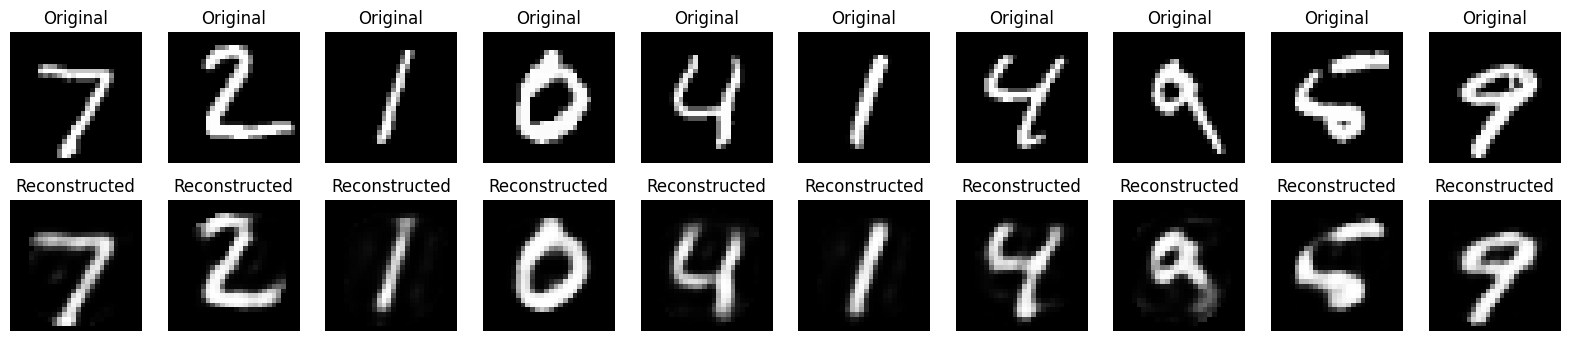

In [ ]:
# Visualize some original and reconstructed images to evaluate the autoencoder
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
  # Original image
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape((28, 28)), cmap='gray')
  plt.title("Original")
  plt.axis("off")

  # Reconstructed image
  bx = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape((28, 28)), cmap='gray')
  plt.title("Reconstructed")
  plt.axis("off")

# 7

In [ ]:
#7

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as  tf

In [ ]:
from sklearn.metrics import accuracy_score,recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import losses, layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
from typing_extensions import assert_type
(x_train,_), (x_test,_) = fashion_mnist.load_data()
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

x_train = x_train[..., tf.newaxis]
x_test =  x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)
x_train_noise = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noise = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

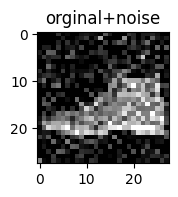

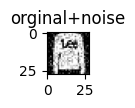

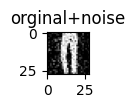

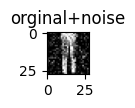

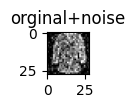

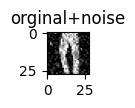

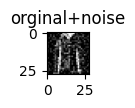

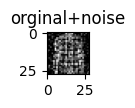

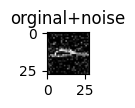

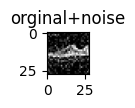

In [ ]:
n=10
plt.figure(figsize=(20,2))
for i in range(n):
    ax = plt.subplot(1,n,i+1)
    plt.title("orginal+noise")
    plt.imshow(tf.squeeze(x_test_noise[i]))
    plt.gray()
    plt.show()

In [ ]:
class Denoise(Model):
  def __init__(self):
    super(Denoise,self).__init__()
    self.encoder = tf.keras.Sequential([
        layers.Input(shape=(28,28,1)),
        layers.Conv2D(16,(3,3),activation='relu',padding='same',strides=2),
        layers.Conv2D(8,(3,3),activation='relu',padding='same',strides=2)])
    self.decoder = tf.keras.Sequential([
        layers.Conv2DTranspose(8, kernel_size=3, activation='relu', strides=2, padding='same'),
        layers.Conv2DTranspose(16, kernel_size=3, activation='relu', strides=2, padding='same'),
        layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
  def call(self,x):
    encoded = self.encoder(x)
    decoded  = self.decoder(encoded)
    return decoded

In [ ]:
autoencoder = Denoise()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train_noise, x_train,
                  epochs=10,
                  shuffle=True,
                  validation_data=(x_test_noise, x_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - loss: 0.0368 - val_loss: 0.0112
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - loss: 0.0108 - val_loss: 0.0098
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - loss: 0.0095 - val_loss: 0.0091
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 30ms/step - loss: 0.0090 - val_loss: 0.0088
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - loss: 0.0082 - val_loss: 0.0082
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 33ms/step - loss: 0.0080 - val_loss: 0.0079


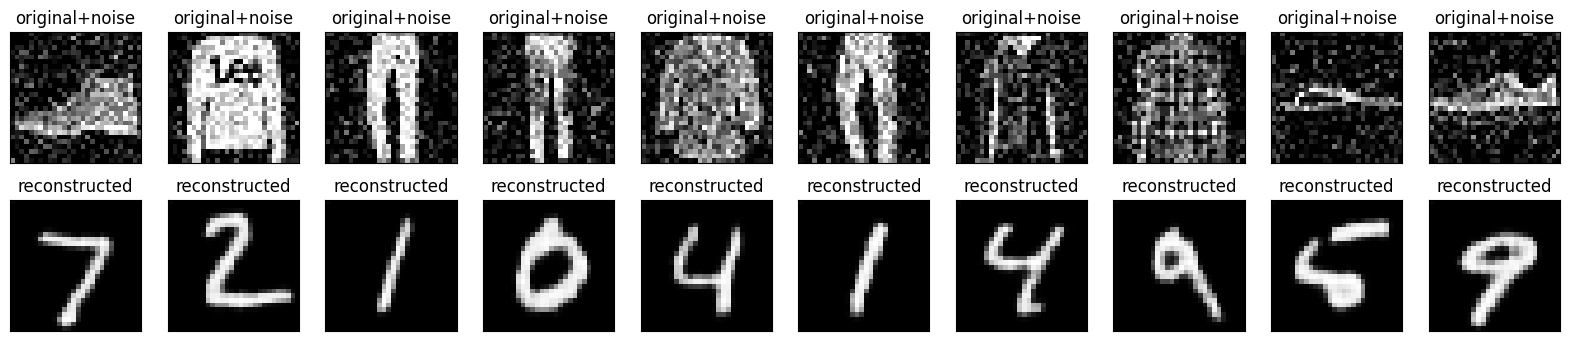

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
n= 10
plt.figure(figsize=(20,4))
for i in range(n):
    #display orignal
    ax = plt.subplot(2,n,i+1)
    plt.title("original+noise")
    plt.imshow(tf.squeeze(x_test_noise[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #display reconstruction
    bx = plt.subplot(2,n,i+n+1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()


# 8a

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.8678 - loss: 0.4283
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - accuracy: 0.9781 - loss: 0.0713
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9852 - loss: 0.0487
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9874 - loss: 0.0381
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9903 - loss: 0.0309
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9838 - loss: 0.0480
Test accuracy: 0.9872999787330627
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


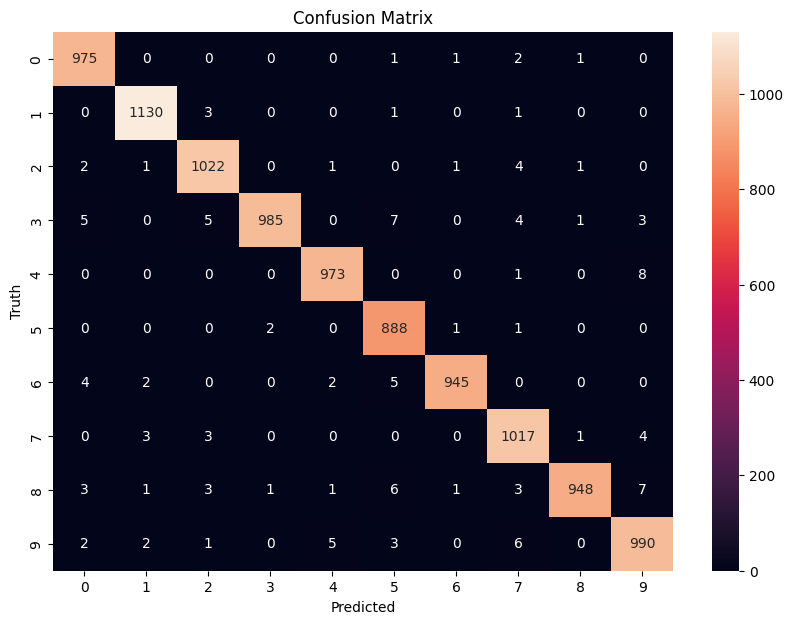

In [ ]:
#8a
#8b
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sn

# load the dataset
(x_train , y_train ) , (x_test , y_test) = mnist.load_data()
x_train , x_test = x_train / 255.0 , x_test / 255.0

# define and train the model
model = Sequential([
    Conv2D(6 , (5,5),activation='relu', input_shape=(28, 28 , 1)),
    MaxPooling2D((2,2)),
    Conv2D(16 , (5,5),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(84,activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train , y_train , epochs=5)

# evaluate the model
test_loss, test_accuracy = model.evaluate(x_test , y_test)
print("Test accuracy:" , test_accuracy)
#Predict labels for test set
y_predicted_probs = model.predict(x_test)
y_predicted_labels = tf.argmax(y_predicted_probs, axis=1)

#create confusion matrix
confusion_matrix = tf.math.confusion_matrix(labels = y_test , predictions=y_predicted_labels)

#plot confusion matrix
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

# 8b!

In [ ]:
# prompt: Implement the architecture for classification of digits in alexNet

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def create_alexnet_model(input_shape=(28, 28, 1), num_classes=10):
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),  # Changed filters
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),  # Changed filters
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),  # Changed filters
            layers.Flatten(),
            layers.Dense(256, activation="relu"),  # Changed units
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )
    return model

# Example usage
model = create_alexnet_model()
model.summary()

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# ... (rest of your training and evaluation code)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 390,410 (1.49 MB)

 Trainable params: 390,410 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

# 9

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - loss: 0.6294 - val_loss: 0.3422
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.4875 - val_loss: 0.2112
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3105 - val_loss: 0.1212
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1946 - val_loss: 0.3778
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2129 - val_loss: 0.1145
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1400 - val_loss: 0.1057
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1306 - val_loss: 0.1373
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1315 - val_loss: 0.0618
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0997 - val_loss: 0.0562
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0786 - val_loss: 0.0749
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0780 - val_loss: 0.0438
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0833 - val_loss: 0.0802
Epoch 13/50

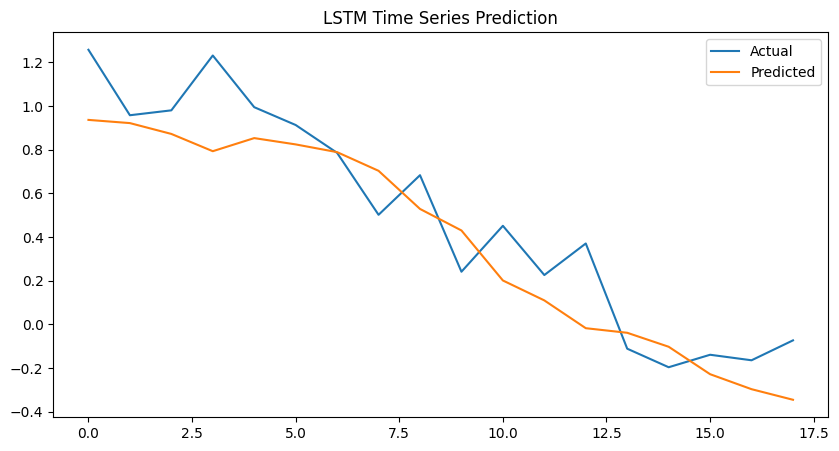

In [ ]:
#9
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Generate synthetic time series data
time_step = np.linspace(0, 10, 100)
data = np.sin(time_step) + 0.5 * np.random.rand(100)

def create_sequences(data, seq_length):
    X = []
    Y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        Y.append(data[i+seq_length])
    return np.array(X), np.array(Y)

# Define sequence length
seq_length = 10

# Create sequences
X, Y = create_sequences(data, seq_length)

# Reshape input to match LSTM expected shape (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

# Build LSTM model
model = keras.Sequential([
    layers.LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    layers.LSTM(50, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), batch_size=8)

# Predict on test dataiu99d+ j w jkjnm
predictions = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(Y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title("LSTM Time Series Prediction")
plt.show()


# 10

In [ ]:
#10
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Fix random seed for reproducibility
tf.random.set_seed(42)

# Load the IMDB dataset with a limit on the number of words
top_words = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

# Pad sequences to ensure a consistent input size for LSTM
max_review_length = 500
x_train = pad_sequences(x_train, maxlen=max_review_length)
x_test = pad_sequences(x_test, maxlen=max_review_length)

# Create a simple LSTM model
embedding_vector_length = 32
model = Sequential([
    Embedding(top_words, embedding_vector_length, input_length=max_review_length),  # Converts word indices to embeddings
    LSTM(100),  # A simple LSTM layer with 100 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification (positive/negative sentiment)
])

# Compile the model with a binary cross-entropy loss, Adam optimizer, and accuracy metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display a summary of the model architecture
model.summary()

# Train the model with a validation set
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=64)

# Evaluate the model on the test set
accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 306s 778ms/step - accuracy: 0.6424 - loss: 0.5977 - val_accuracy: 0.8435 - val_loss: 0.3699
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 321s 777ms/step - accuracy: 0.8604 - loss: 0.3307 - val_accuracy: 0.8534 - val_loss: 0.3595
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 382s 931ms/step - accuracy: 0.8829 - loss: 0.2933 - val_accuracy: 0.8579 - val_loss: 0.3512
Test Accuracy: 85.79%
